In [1]:
import numpy as np
import cv2
from scipy.signal import correlate2d, convolve2d

In [2]:
# Ler a imagem em escala de cinza
image = cv2.imread('cameraman.bmp', cv2.IMREAD_GRAYSCALE)

# Filtro box

In [3]:
import matplotlib.pyplot as plt
def plot(original_image, filtered_image):
    fig, axs = plt.subplots(1, 2, figsize=(13, 13))
    axs[0].imshow(original_image, cmap='gray')
    axs[0].set_title('Original')
    axs[1].imshow(filtered_image, cmap='gray')
    axs[1].set_title('Imagem filtrada')
    plt.show()

In [4]:
# Construindo o filtro Box
box_filter = np.ones((3,3), dtype=np.float64)/9
# Aplicando o filtro Box na imagem 
filtered_box_image = correlate2d(image, box_filter, mode='same', boundary='symm')
# Garantindo que os valores da imagem filtrada estejam entre 0 e 255
filtered_box_image = np.clip(filtered_box_image, 0, 255).astype(np.uint8)

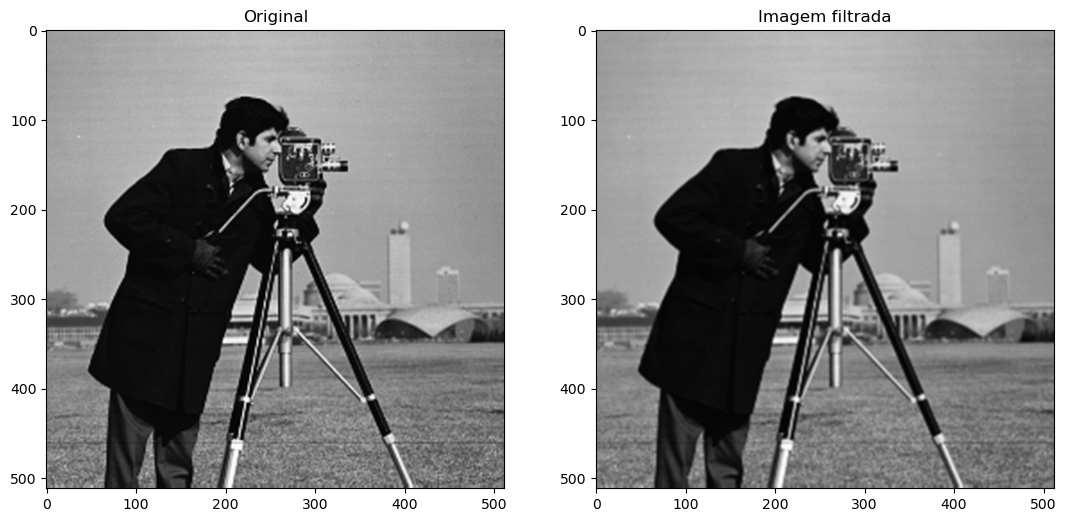

In [5]:
plot(image, filtered_box_image)

# Filtro 2

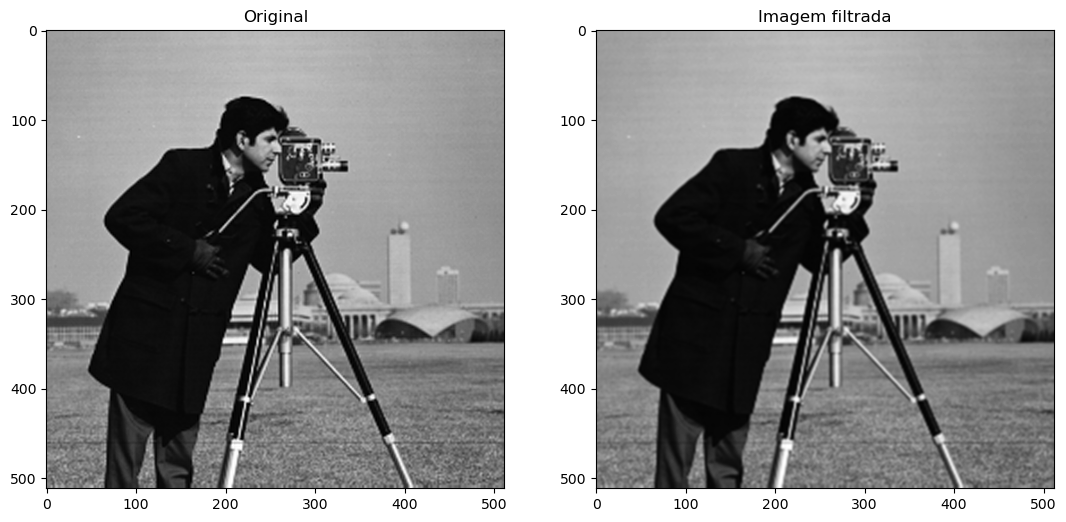

In [7]:
# Constrói o filtro h1
h1 = np.ones((3,1), dtype=np.float64)/3
# Constrói o filtro h2
h2 = np.ones((1,3), dtype=np.float64)/3

# Aplica o filtro h1 na imagem
filtered_h1_image = correlate2d(image, h1, mode='same', boundary='symm')
# Aplica o filtro h2 na imagem após a aplicação do filtro h1
filtered_h2_h1_image = correlate2d(filtered_h1_image, h2, mode='same', boundary='symm')

# Garante que os valores da imagem filtrada estejam entre 0 e 255 e que sejam inteiros
filtered_h2_h1_image = np.clip(filtered_h2_h1_image, 0, 255).astype(np.uint8)
# Mostra a imagem filtrada
plot(image, filtered_h2_h1_image)

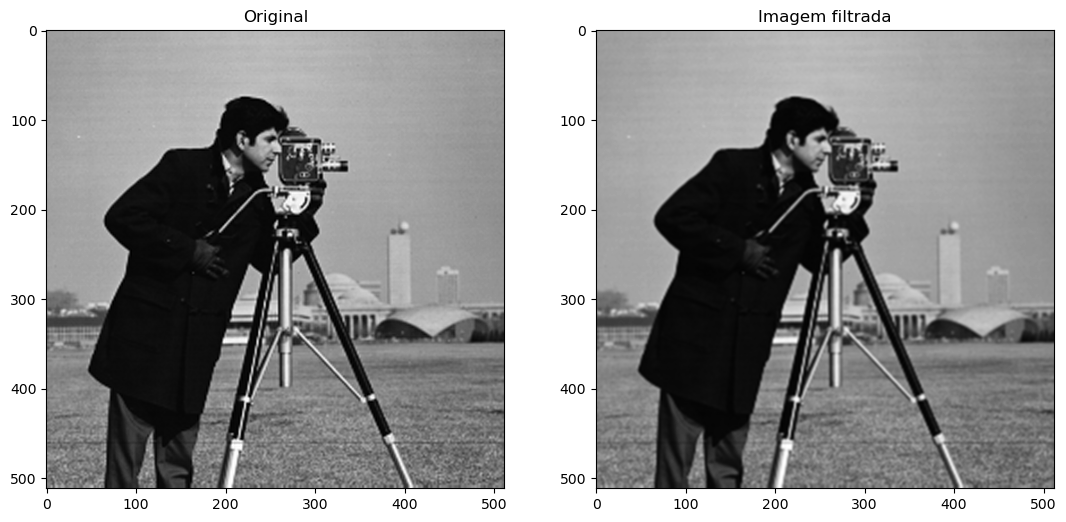

In [51]:
plot(image, filtered_h2_h1_image)

In [8]:
# MAE
np.abs(filtered_h2_h1_image - filtered_box_image).mean()

1.163248134156223e-14

In [14]:
filtered_h2_h1_image

array([[155.88888889, 157.11111111, 158.33333333, ..., 151.33333333,
        151.33333333, 151.33333333],
       [156.55555556, 157.        , 157.55555556, ..., 151.88888889,
        151.77777778, 151.66666667],
       [157.55555556, 156.88888889, 156.33333333, ..., 152.88888889,
        152.44444444, 152.11111111],
       ...,
       [120.33333333, 123.11111111, 125.33333333, ..., 121.66666667,
        114.44444444, 110.55555556],
       [121.55555556, 123.11111111, 124.        , ..., 121.        ,
        114.44444444, 110.88888889],
       [121.55555556, 123.11111111, 124.        , ..., 121.        ,
        114.44444444, 110.88888889]])

In [15]:
filtered_box_image

array([[155.88888889, 157.11111111, 158.33333333, ..., 151.33333333,
        151.33333333, 151.33333333],
       [156.55555556, 157.        , 157.55555556, ..., 151.88888889,
        151.77777778, 151.66666667],
       [157.55555556, 156.88888889, 156.33333333, ..., 152.88888889,
        152.44444444, 152.11111111],
       ...,
       [120.33333333, 123.11111111, 125.33333333, ..., 121.66666667,
        114.44444444, 110.55555556],
       [121.55555556, 123.11111111, 124.        , ..., 121.        ,
        114.44444444, 110.88888889],
       [121.55555556, 123.11111111, 124.        , ..., 121.        ,
        114.44444444, 110.88888889]])

a) a imagem resultante sofreu um borramento ao utilizar a filtragem sequencial com h1 e o resultado com o h2.

b) A imagem gerada ficou bem parecida visualmente com a obtida após a filtragem com o filtro box, tal percepeção é comprovada com o MAE bem baixo, mostrando imagens bem próximas.

In [10]:
# c)
h2_h1 = convolve2d(h2, h1)

In [11]:
h2_h1

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [12]:
np.equal(h2_h1, box_filter).all()

True

In [ ]:
 # Vemos que a máscara gerada é exatamente a mesma utilizada anteriormente, o filtro box.
# E pela convolução ser associativa, temos que o resultado das duas filtragem são exatamente iguais.